In [30]:
%load_ext autoreload
%autoreload 2

import torch_geometric as ptgeo
import matplotlib.pyplot as plt

from gninvert.rule_discovery import find_model
from gninvert.gns import SingleDiffusionGN, MultiDiffusionGN
from gninvert.data_generation import get_TrainingData
from gninvert.training import graphs_loss_func
from gninvert.gnns import GNN_full

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gn = SingleDiffusionGN(diffusion_constant=0.1)
td = get_TrainingData(gn, big=True, graphs=20)

In [3]:
td.total_graph_size()

{'nodes': 76880, 'features': 76880, 'edges': 297600}

In [4]:
tds = get_TrainingData(SingleDiffusionGN(0.1))

In [5]:
tds.total_graph_size()

{'nodes': 7600, 'features': 7600, 'edges': 13600}

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

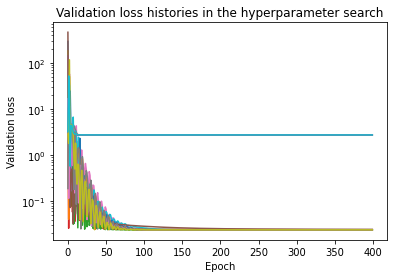

In [15]:
reses = [find_model(td, hyperparam_overrides={'epochs': 400}) for _ in range(20)]

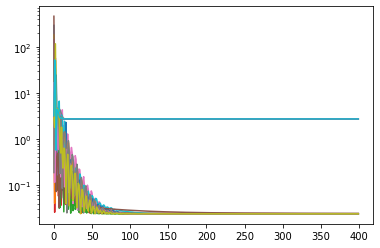

In [16]:
for res in reses:
    plt.plot(res[0]['val_loss_history'])
plt.yscale('log')

Number of node features: 1
Only one hyperparameter setting found; will not run a hyperparameter search.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

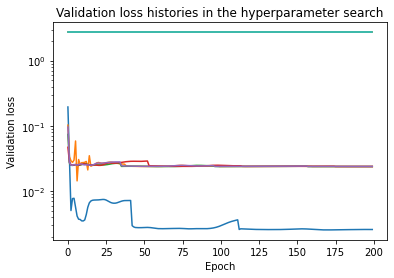

In [22]:
res = find_model(
    td,
    hyperparam_overrides={'epochs': 200, 'batch_size': 1},
    best_of = 10
)